---
#### <b>Name : Ayodya W.K.H</b>
#### <b>Index No : 190065K</b>
#### <b>Asssignment II - Fitting and Allignment</b>
---
##### GitHub Link : https://github.com/ayodyawkh/EN2550/blob/main/Assignment_2/Assignment_2.ipynb
---

#### <b>Question 1</b>

In [24]:
import numpy as np 
from scipy.optimize import minimize 
from scipy import linalg 
import matplotlib.pyplot as plt
import random


N = 100 
half_n = N//2
r = 10 
s = r/16 
t = np.random.uniform(0, 2*np.pi, half_n) 
n = s*np.random.randn(half_n) 
x1 , y1 = (r + n) * np.cos(t), (r + n) * np.sin(t) 
X_circ = np.hstack((x1.reshape(half_n, 1) , y1.reshape(half_n, 1))) 

m, b = -1, 2 
x2 = np.linspace(-12, 12, half_n) 
y2 = m * x2 + b + s * np.random.randn(half_n) 
X_line = np.hstack((x2.reshape(half_n, 1) , y2.reshape(half_n, 1))) 
X = np.vstack((X_circ , X_line))
y = y1 + y2

In [25]:
class RANSAC:
    def __init__(self, x_data, y_data, min_samples, dis_thres, num_samples):
        self.x_data = x_data
        self.y_data = y_data
        self.s = min_samples
        self.t = dis_thres
        self.N = num_samples
        self.best_model = None
        self.inliers = []
        self.outliers = []
        self.points = []

    def distance(self, p1, p2):
        return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5

    def random_sample(self):
        self.points = []
        i = 0
        while i < self.s:
            ind = random.randint(0, len(self.x_data) - 1)
            pnt = (self.x_data[ind], self.y_data[ind])
            if pnt not in self.points:
                self.points.append(pnt)
                i += 1

    def circle_equation(self):
        pt1, pt2, pt3 = self.points
        Y = np.array([[pt2[0] - pt1[0], pt2[1] - pt1[1]], [pt3[0] - pt2[0], pt3[1] - pt2[1]]])
        Z = np.array([[pt2[0]**2 - pt1[0]**2 + pt2[1]**2 - pt1[1]**2], [pt3[0]**2 - pt2[0]**2 + pt3[1]**2 - pt2[1]**2]])
        inverse_Y = linalg.inv(Y)
        c_x, c_y = np.dot(inverse_Y, Z) / 2
        cx, cy = c_x[0], c_y[0]
        r = np.sqrt((cx - pt1[0])**2 + (cy - pt1[1])**2)
        return cx, cy, r

    def inliers_filter(self):
        new_inliers = []
        new_outliers = []
        xc, yc, r=self.circle_equation()
        for i in range(len(self.x_data)):
            dist = self.distance((self.x_data[i], self.y_data[i]), (xc,yc))
            if abs(dist - r) <= self.t:
                new_inliers.append((self.x_data[i], self.y_data[i]))
            else:
                new_outliers.append((self.x_data[i], self.y_data[i]))   
        if len(self.inliers) < len(new_inliers):
            self.inliers = new_inliers
            self.outliers = new_outliers
            self.best_model = (xc,yc,r)

    def model_finder(self):
        for i in range(self.N):
            self.random_sample()
            self.inliers_filter()
        return self.best_model  

In [26]:
best_samp = RANSAC(X[:,0], X[:,1], 3, 1, 35)
best_samp.model_finder()

(1.0179645634206442, 0.16558919856896392, 10.014785155822635)

In [27]:
ransac = RANSAC(np.array(best_samp.inliers)[:,0], np.array(best_samp.inliers)[:, 1], 3, 1, 35)
ransac.model_finder()

(0.6661930300473572, -0.2701825387774708, 9.910769341495056)

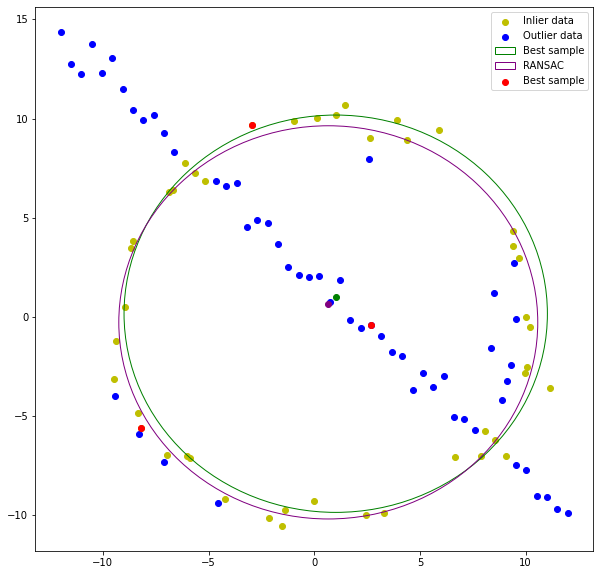

In [28]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(np.array(best_samp.inliers)[:,0], np.array(best_samp.inliers)[:, 1], c = 'y', label = 'Inlier data')
ax.scatter(np.array(best_samp.outliers)[:,0], np.array(best_samp.outliers)[:,1], c = 'b', label = 'Outlier data')

circle1 = plt.Circle((best_samp.best_model[0], best_samp.best_model[1]), best_samp.best_model[2], color = 'green', fill = False, label = 'Best sample')
ax.add_patch(circle1)
circle2 = plt.Circle((ransac.best_model[0], ransac.best_model[1]), ransac.best_model[2], color = 'purple', fill = False,label = 'RANSAC')
ax.add_patch(circle2)

ax.scatter(np.array(best_samp.points)[:, 0], np.array(best_samp.points)[:, 1], c = 'r', label = 'Best sample')
ax.scatter(best_samp.best_model[0], best_samp.best_model[0], c = 'green')
ax.scatter(ransac.best_model[0], ransac.best_model[0], c = 'purple')
ax.legend(loc = 'upper right')
plt.show()

#### <b>Question 2</b>

In [33]:
img_hall = cv.imread(r'hall.jpg')
assert img_hall is not None
img_flag = cv.imread(r'flag.png')
assert img_flag is not None

hall_height, hall_width = np.shape(img_hall)[0], np.shape(img_hall)[1]
flag_height, flag_width = np.shape(img_flag)[0], np.shape(img_flag)[1]

#code to get the mouse click points
click_pts = []
def click_left_button(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        click_pts.append([x,y])

cv.imshow('image', img_hall)
cv.setMouseCallback('image', click_left_button)
cv.waitKey(0)
cv.destroyAllWindows()

#points corresponding to the mouse clicks
x_1 = click_pts[0][0]
y_1 = click_pts[0][1]

x_2 = click_pts[1][0]
y_2 = click_pts[1][1]

x_3 = click_pts[2][0]
y_3 = click_pts[2][1]

x_4 = click_pts[3][0]
y_4 = click_pts[3][1]

#get corner points of the flag
x_1T = np.array([[0, 0, 1]])
x_2T = np.array([[flag_width - 1, 0, 1]])
x_3T = np.array([[flag_width - 1, flag_height - 1, 1]])
x_4T = np.array([[0, flag_height - 1, 1]])

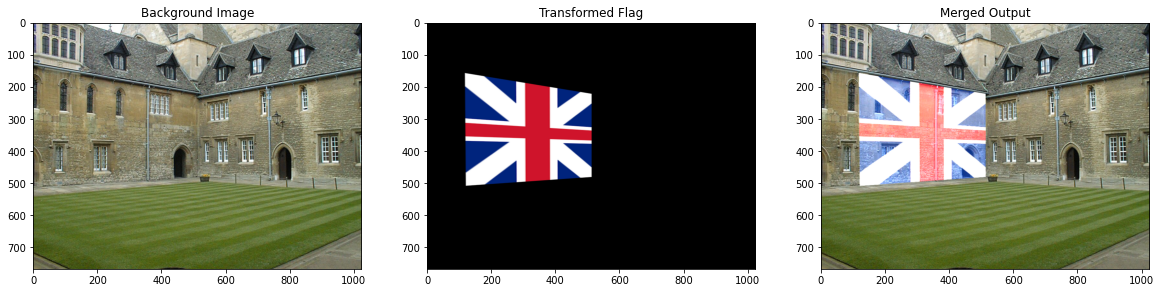

In [35]:
#make the matrix A
zero_matrix = np.array([[0],[0],[0]])

a = np.concatenate((zero_matrix.T, x_1T, -y_1 * x_1T), axis = 1)
b = np.concatenate((x_1T, zero_matrix.T, -x_1 * x_1T), axis = 1)

c = np.concatenate((zero_matrix.T, x_2T, -y_2 * x_2T), axis = 1)
d = np.concatenate((x_2T, zero_matrix.T, -x_2 * x_2T), axis = 1)

e = np.concatenate((zero_matrix.T, x_3T, -y_3 * x_3T), axis = 1)
f = np.concatenate((x_3T, zero_matrix.T, -x_3 * x_3T), axis = 1)

g = np.concatenate((zero_matrix.T, x_4T, -y_4 * x_4T), axis = 1)
h = np.concatenate((x_4T, zero_matrix.T, -x_4 * x_4T), axis = 1)

A = np.concatenate((a,b,c,d,e,f,g,h), axis = 0, dtype = np.float64)

Final_Matrix = (A.T)@A
W,V = np.linalg.eig(Final_Matrix)
temph = V[:, np.argmin(W)]
H = temph.reshape((3,3))

flag_transformed = cv.warpPerspective(img_flag, H,(hall_width, hall_height))
output = cv.add(flag_transformed,img_hall)

fig, ax = plt.subplots(1,3,figsize=(20,20))
ax[0].imshow(cv.cvtColor(img_hall, cv.COLOR_BGR2RGB)), ax[0].set_title("Background Image")
ax[1].imshow(cv.cvtColor(flag_transformed, cv.COLOR_BGR2RGB)), ax[1].set_title("Transformed Flag")
ax[2].imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB)), ax[2].set_title("Merged Output")
plt.show()

#### <b>Question 3</b>

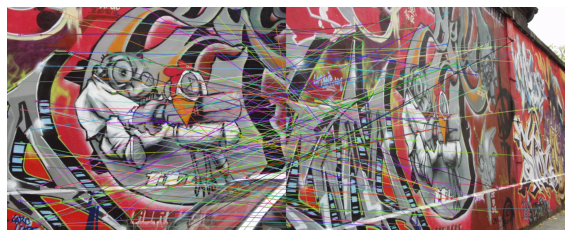

In [18]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img1=cv.imread(r'img1.ppm')
assert img1 is not None
img5=cv.imread(r'img5.ppm')
assert img5 is not None

gray_1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray_5 = cv.cvtColor(img5, cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()

key_p1, des1 = sift.detectAndCompute(gray_1, None)
key_p5, des5 = sift.detectAndCompute(gray_5, None)

bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des5,k=2)

good = []
for m,n in matches:
    if m.distance < 0.8*n.distance:
        good.append([m])

img_new = cv.drawMatchesKnn(img1,key_p1,img5,key_p5,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.imshow(cv.cvtColor(img_new,cv.COLOR_BGR2RGB))
ax.axis('off')
plt.show()

In [23]:
src_pts = 0
dst_pts = 0
dst_pts = np.float32([key_p1[m[0].queryIdx].pt for m in good]).reshape(-1, 2)
src_pts = np.float32([key_p5[m[0].trainIdx].pt for m in good]).reshape(-1, 2)


def generateRandom(src_Pts, dest_Pts, N):
    r = np.random.choice(len(src_Pts), N)
    src = [src_Pts[i] for i in r]
    dest = [dest_Pts[i] for i in r]
    return np.asarray(src, dtype=np.float32), np.asarray(dest, dtype=np.float32)


def findH(src, dest, N):
    A = []
    for i in range(N):
        x, y = src[i][0], src[i][1]
        xp, yp = dest[i][0], dest[i][1]
        A.append([x, y, 1, 0, 0, 0, -x * xp, -xp * y, -xp])
        A.append([0, 0, 0, x, y, 1, -yp * x, -yp * y, -yp])
    A = np.asarray(A)
    U, S, Vh = np.linalg.svd(A)
    L = Vh[-1, :] / Vh[-1, -1]
    H = L.reshape(3, 3)
    return H


def ransacHomography(src_Pts, dst_Pts):
    maxI = 0
    maxLSrc = []
    maxLDest = []
    for i in range(500):
        srcP, destP = generateRandom(src_Pts, dst_Pts, 4)
        H = findH(srcP, destP, 4)
        inlines = 0
        linesSrc = []
        lineDest = []
        for p1, p2 in zip(src_Pts, dst_Pts):
            p1U = (np.append(p1, 1)).reshape(3, 1)
            p2e = H.dot(p1U)
            p2e = (p2e / p2e[2])[:2].reshape(1, 2)[0]
            if cv.norm(p2 - p2e) < 10:
                inlines += 1
                linesSrc.append(p1)
                lineDest.append(p2)
        if inlines > maxI:
            maxI = inlines
            maxLSrc = linesSrc.copy()
            maxLSrc = np.asarray(maxLSrc, dtype=np.float32)
            maxLDest = lineDest.copy()
            maxLDest = np.asarray(maxLDest, dtype=np.float32)
    Hf = findH(maxLSrc, maxLDest, maxI)
    return Hf

In [30]:
H = ransacHomography(src_pts, dst_pts)

H_given=[]
with open(r'H1to5p') as f:
    H_given=np.array([[float(h) for h in line.split()] for line in f])

print('H - calculated\n', H,'\n')
print('H - given\n', H_given)

H - calculated
 [[-1.65687362e+00  1.52779533e+00  3.50250571e+02]
 [-1.41650929e+00  1.28373142e+00  2.69896933e+02]
 [-3.42648173e-03  2.34369085e-03  1.00000000e+00]] 

H - given
 [[ 6.2544644e-01  5.7759174e-02  2.2201217e+02]
 [ 2.2240536e-01  1.1652147e+00 -2.5605611e+01]
 [ 4.9212545e-04 -3.6542424e-05  1.0000000e+00]]


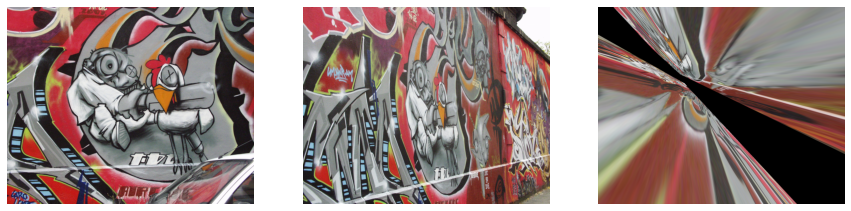

In [31]:
dst = cv.warpPerspective(img5,H, ((img1.shape[1] + img5.shape[1]), img5.shape[0]+ img5.shape[0])) 

fig,ax=plt.subplots(1,3,figsize=(15,15))
ax[0].imshow(cv.cvtColor(img1,cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(img5,cv.COLOR_BGR2RGB))
ax[1].axis('off')
ax[2].imshow(cv.cvtColor(dst,cv.COLOR_BGR2RGB))
ax[2].axis('off')
plt.show()